# Left-Right symmetric model Lagrangian

In this notebook we study the potential in the reference of [Barenboim1996](https://arxiv.org/abs/hep-ph/9603379v1) in the case of real vev's, as a consequence $\alpha = \theta = 0$. For the tadpoles we also consider $k_2 = k_1$

In [186]:
from sympy import symbols, init_printing, Matrix, I, sqrt, conjugate, trace, factor, simplify
from sympy.physics import msigma 
init_printing()

## Scalars

### Triplets

In [187]:
deltaLp, deltaLpp = symbols(r'\delta_L^+, \delta_L^{++}')
deltaRp, deltaRpp = symbols(r'\delta_R^+, \delta_R^{++}')

deltaL0 = symbols(r'\delta_L^0')
deltaR0 = symbols(r'\delta_R^0') ####### These fields are complex in general

In [188]:
sqrt2 = sqrt(2)
DeltaL = Matrix(
    [
        [deltaLp/sqrt2, deltaLpp],
        [deltaL0, -deltaLp/sqrt2]
    ]
)
DeltaR = Matrix(
    [
        [deltaRp/sqrt2, deltaRpp],
        [deltaR0, -deltaRp/sqrt2]
    ]
)

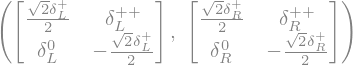

In [189]:
DeltaL, DeltaR

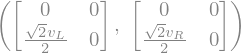

In [190]:
vL, vR, theta = symbols(r'v_L, v_R, \theta', positive=True)
vevL = {deltaL0:vL/sqrt2, deltaLp:0, deltaLpp:0}
vevR = {deltaR0:vR/sqrt2, deltaRp:0, deltaRpp:0}
DeltaL.subs(vevL), DeltaR.subs(vevR)

### Bidoublet

In [191]:
phi1p = symbols(r'\phi_1^+')
phi2p = symbols(r'\phi_2^+')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0')

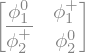

In [192]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [conjugate(phi2p), phi20]
    ]
)
Phi

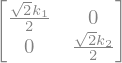

In [193]:
k1, k2 = symbols(r"k_1, k_2", positive=True)
vevPhi = {phi10:k1/sqrt2, phi20:k2/sqrt2, phi1p:0, phi2p:0}
Phi.subs(vevPhi)

## Scalar potential and Higgs mass spectrum

In [194]:
from sympy.physics.quantum import Dagger
from sympy import solve

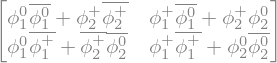

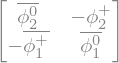

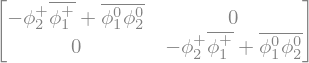

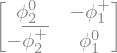

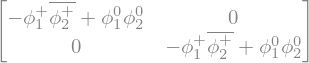

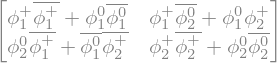

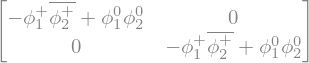

In [195]:
PhiDagger = Dagger(Phi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
Phitilde = (msigma(2)*conjugate(Phi)*msigma(2))
#Phitilde
display(Phitilde)
PhitildePhiDagger = Phitilde*PhiDagger
display(PhitildePhiDagger)
PhitildeDagger = Dagger(Phitilde)
#PhitildeDagger
display(PhitildeDagger)
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)
PhiPhitildeDagger = Phi*PhitildeDagger
display(PhiPhitildeDagger)

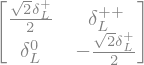

In [196]:
DeltaL

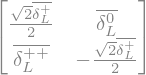

In [197]:
DeltaLDagger = Dagger(DeltaL)
DeltaLDagger

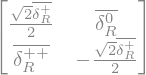

In [198]:
DeltaRDagger = Dagger(DeltaR)
DeltaRDagger

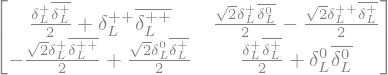

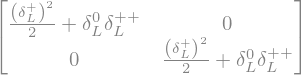

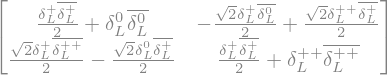

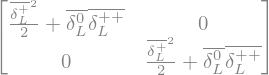

In [199]:
DeltaLDeltaLDagger = DeltaL*DeltaLDagger
display(DeltaLDeltaLDagger)
DeltaLDeltaL = DeltaL*DeltaL
display(DeltaLDeltaL)
DeltaLDaggerDeltaL = DeltaLDagger*DeltaL
display(DeltaLDaggerDeltaL)
DeltaLDaggerDeltaLDagger = DeltaLDagger*DeltaLDagger
display(DeltaLDaggerDeltaLDagger)

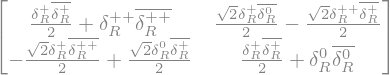

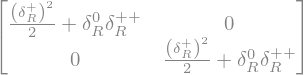

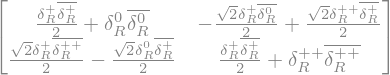

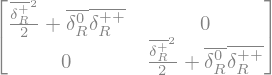

In [200]:
DeltaRDeltaRDagger = DeltaR*DeltaRDagger
display(DeltaRDeltaRDagger)
DeltaRDeltaR = DeltaR*DeltaR
display(DeltaRDeltaR)
DeltaRDaggerDeltaR = DeltaRDagger*DeltaR
display(DeltaRDaggerDeltaR)
DeltaRDaggerDeltaRDagger = DeltaRDagger*DeltaRDagger
display(DeltaRDaggerDeltaRDagger)

### Higgs potential

In [201]:
mu12, mu22, mu32 = symbols(r'\mu_1^2, \mu_2^2, \mu_3^2', real=True)
lamb1, lamb2, lamb3, lamb4 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4', real=True)
rho1, rho2, rho3, rho4 = symbols(r'\rho_1, \rho_2, \rho_3, \rho_4', real=True)
alpha1, alpha2, alpha3 = symbols(r'\alpha_1, \alpha_2, \alpha_3', real=True)
beta1, beta2, beta3 = symbols(r'beta_1, beta_2, beta_3', real=True)

In [202]:
VLRPhi = (
    # Vphi
    -mu12*trace(PhiDaggerPhi)
    - mu22*(trace(Phitilde*PhiDagger) + trace(PhitildeDagger*Phi))
    #
    + lamb1*(trace(PhiPhiDagger))**2
    + lamb2*(trace(PhitildePhiDagger)**2 + trace(PhitildeDaggerPhi)**2)
    + lamb3*trace(PhitildePhiDagger)*trace(PhitildeDaggerPhi)
    + lamb4*trace(PhiDaggerPhi)*(trace(PhitildePhiDagger) + trace(PhitildeDaggerPhi))
    # Vtriplet
    -mu32*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + rho1*(trace(DeltaLDeltaLDagger)**2 + trace(DeltaRDeltaRDagger)**2)
    + rho2*(trace(DeltaLDeltaL)*trace(DeltaLDaggerDeltaLDagger) + trace(DeltaRDeltaR)*trace(DeltaRDaggerDeltaRDagger))
    + rho3*trace(DeltaLDeltaLDagger)*trace(DeltaRDeltaRDagger)
    + rho4*(trace(DeltaLDeltaL)*trace(DeltaRDaggerDeltaRDagger) + trace(DeltaLDaggerDeltaLDagger)*trace(DeltaRDeltaR))
    # Vdoubletriplet
    + alpha1*trace(PhiDaggerPhi)*(trace(DeltaLDeltaLDagger) + trace(DeltaRDeltaRDagger))
    + alpha2*(
        trace(PhitildeDaggerPhi)*trace(DeltaRDeltaRDagger) + trace(PhitildePhiDagger)*trace(DeltaLDeltaLDagger) + 
        trace(PhitildePhiDagger)*trace(DeltaRDeltaRDagger) + trace(PhitildeDaggerPhi)*trace(DeltaLDeltaLDagger) # this term is different to Barenboim1996, because there is an error in the hermitian conjugate  the proportional terms to DeltaLDeltaLDagger
    )
    # + alpha3*(trace(PhiPhiDagger*DeltaLDeltaLDagger) + trace(PhiDaggerPhi*DeltaRDeltaRDagger))
    + beta1*(trace(Phi*DeltaR*PhiDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phi*DeltaRDagger))
    + beta2*(trace(Phitilde*DeltaR*PhiDagger*DeltaLDagger) + trace(PhitildeDagger*DeltaL*Phi*DeltaRDagger))
    # beta3 = beta2 in this case
    + beta2*(trace(Phi*DeltaR*PhitildeDagger*DeltaLDagger) + trace(PhiDagger*DeltaL*Phitilde*DeltaRDagger))
)
#VLRPhi.subs(vevL).subs(vevR).subs(vevPhi)

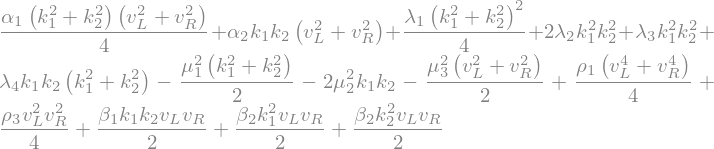

In [203]:
VLRPhi_vev = VLRPhi.subs(vevL).subs(vevR).subs(vevPhi).simplify()#.collect([mu12, mu22, mu32, lamb2, rho1, beta2], factor)#.subs(k1ri)
VLRPhi_vev

Calculation of the tadpole condition. In this case we only have four conditions because the vev are real.

In [204]:
scalar_vevs = [k1, k2, vR, vL]
tadpoles_relations = {}
for vev in scalar_vevs:
    tadpoles_relations[vev] = VLRPhi_vev.diff(vev).expand().collect(
    [alpha1, alpha2, lamb1, lamb2, lamb3, lamb4, beta1, beta2], factor)

## Caso $k_2=k_1$

In [205]:
from sympy import trigsimp

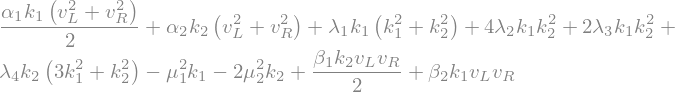

In [206]:
tadpole1_caso1 = tadpoles_relations[k1].trigsimp()
tadpole1_caso1

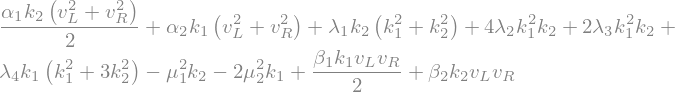

In [207]:
tadpole2_caso1 = tadpoles_relations[k2].trigsimp()
tadpole2_caso1

In [208]:
tadpole12_sol_caso1 = solve([tadpole1_caso1, tadpole2_caso1], [mu12, mu22], dict=True)[0]

In [209]:
for vev in tadpole12_sol_caso1:
    tadpole12_sol_caso1[vev] = tadpole12_sol_caso1[vev].collect([k1, alpha1, alpha2],  trigsimp)

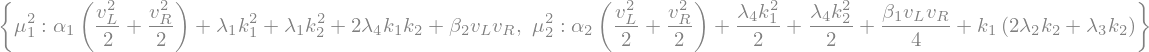

In [210]:
tadpole12_sol_caso1

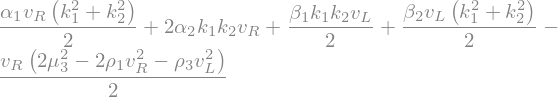

In [211]:
tadpole3_caso1 = tadpoles_relations[vR].trigsimp()
tadpole3_caso1

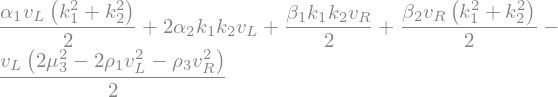

In [212]:
tadpole4_caso1 = tadpoles_relations[vL].trigsimp()
tadpole4_caso1

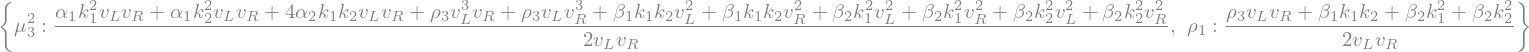

In [379]:
mu32_sol = solve([tadpole3_caso1, tadpole4_caso1], [mu32, rho1], dict=True)[0]
mu32_sol

In [382]:
for key in mu32_sol:
    mu32_sol[key] = mu32_sol[key].expand().collect(rho3, lambda x:x.simplify())

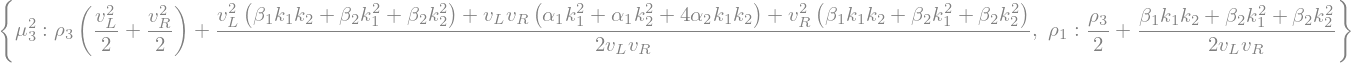

In [383]:
mu32_sol

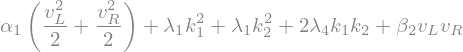

\begin{align*}
\mu^{2}_{1} = & \alpha_{1} \left(\frac{v_{L}^{2}}{2} + \frac{v_{R}^{2}}{2}\right) + \lambda_{1} k_{1}^{2} + \lambda_{1} k_{2}^{2} \\
& + 2 \lambda_{4} k_{1} k_{2} + \beta_{2} v_{L} v_{R} 
\end{align*}




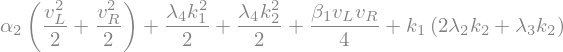

\begin{align*}
\mu^{2}_{2} = & \alpha_{2} \left(\frac{v_{L}^{2}}{2} + \frac{v_{R}^{2}}{2}\right) + \frac{\lambda_{4} k_{1}^{2}}{2} + \frac{\lambda_{4} k_{2}^{2}}{2} \\
& + \frac{\beta_{1} v_{L} v_{R}}{4} + k_{1} \left(2 \lambda_{2} k_{2} + \lambda_{3} k_{2}\right) 
\end{align*}




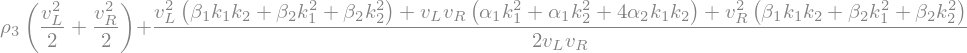

\begin{align*}
\mu^{2}_{3} = & \rho_{3} \left(\frac{v_{L}^{2}}{2} + \frac{v_{R}^{2}}{2}\right) + \frac{v_{L}^{2} \left(\beta_{1} k_{1} k_{2} + \beta_{2} k_{1}^{2} + \beta_{2} k_{2}^{2}\right) + v_{L} v_{R} \left(\alpha_{1} k_{1}^{2} + \alpha_{1} k_{2}^{2} + 4 \alpha_{2} k_{1} k_{2}\right) + v_{R}^{2} \left(\beta_{1} k_{1} k_{2} + \beta_{2} k_{1}^{2} + \beta_{2} k_{2}^{2}\right)}{2 v_{L} v_{R}} 
\end{align*}




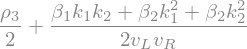

\begin{align*}
\rho_{1} = & \frac{\rho_{3}}{2} + \frac{\beta_{1} k_{1} k_{2} + \beta_{2} k_{1}^{2} + \beta_{2} k_{2}^{2}}{2 v_{L} v_{R}} 
\end{align*}




In [455]:
# activate to print the latex code of the tadpole econditions
from sympy import multiline_latex

for tadpole in [tadpole12_sol_caso1, mu32_sol]:
    for param, exp in tadpole.items():
        display(param, exp)
        print(multiline_latex(param, exp, terms_per_line=3))
        print('\n')

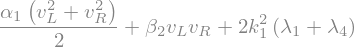

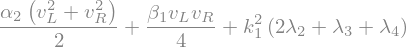

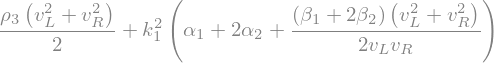

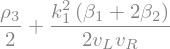

In [456]:
tadpole_conditions_caso1 = {}
for tadpole in [tadpole12_sol_caso1, mu32_sol]:
    for param, exp in tadpole.items():
        exp_k1 = exp.subs(k2, k1).expand().collect(k1, lambda x:x.collect([alpha1, alpha2], factor))
        tadpole_conditions_caso1[param] = exp_k1
        display(param, exp_k1)
        #print(multiline_latex(param, exp_k1, terms_per_line=3)) # activate to print latex code of tadpoles
        print('\n')

In [457]:
b12, lamb14, lamb234, alpha12 = symbols(r'b_{12}, \lambda_{14}, \lambda_{234}, \alpha_{12}', positive=True)
tadpoles_paterns = {
    beta1 + 2*beta2: b12,
    lamb1 + lamb4:lamb14,
    2*lamb2 + lamb3 + lamb4: lamb234,
    alpha1 + 2*alpha2:alpha12
}

In [458]:
for param in tadpole_conditions_caso1:
    tadpole_conditions_caso1[param] =  tadpole_conditions_caso1[param]#.subs(tadpoles_paterns)

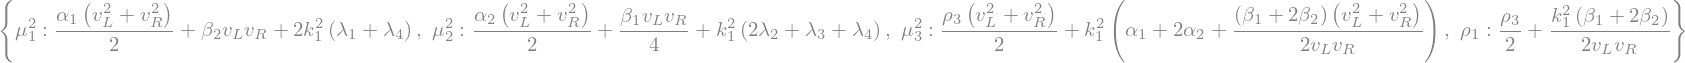

In [459]:
tadpole_conditions_caso1

## Mass matrices

Expand neutral fields in terms of real and imaginary parts
$$F = \frac{1}{\sqrt{2}}(F^r + i F^i)$$

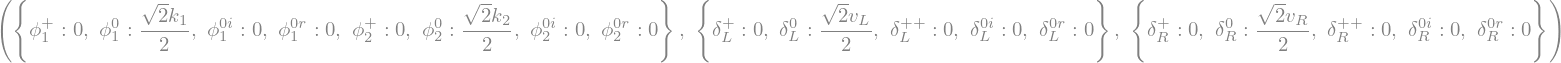

In [460]:
vevPhi, vevL, vevR

In [461]:
phi10r, phi10i = symbols(r'\phi_1^{0r}, \phi_1^{0i}', real=True)
phi20r, phi20i = symbols(r'\phi_2^{0r}, \phi_2^{0i}', real=True)
deltaR0r, deltaR0i = symbols(r'\delta_R^{0r}, \delta_R^{0i}', real=True)
deltaL0r, deltaL0i = symbols(r'\delta_L^{0r}, \delta_L^{0i}', real=True)
complex_scalar_fields = {
    phi10: (k1 + phi10r + I*phi10i)/sqrt2,
    phi20: (k2 + phi20r + I*phi20i)/sqrt2,
    deltaR0: (vR + deltaR0r + I*deltaR0i)/sqrt2,
    deltaL0: (vL + deltaL0r + I*deltaL0i)/sqrt2
}

In [462]:
VLRPhi_ri = VLRPhi.subs(complex_scalar_fields)

# Scalar mass matrices

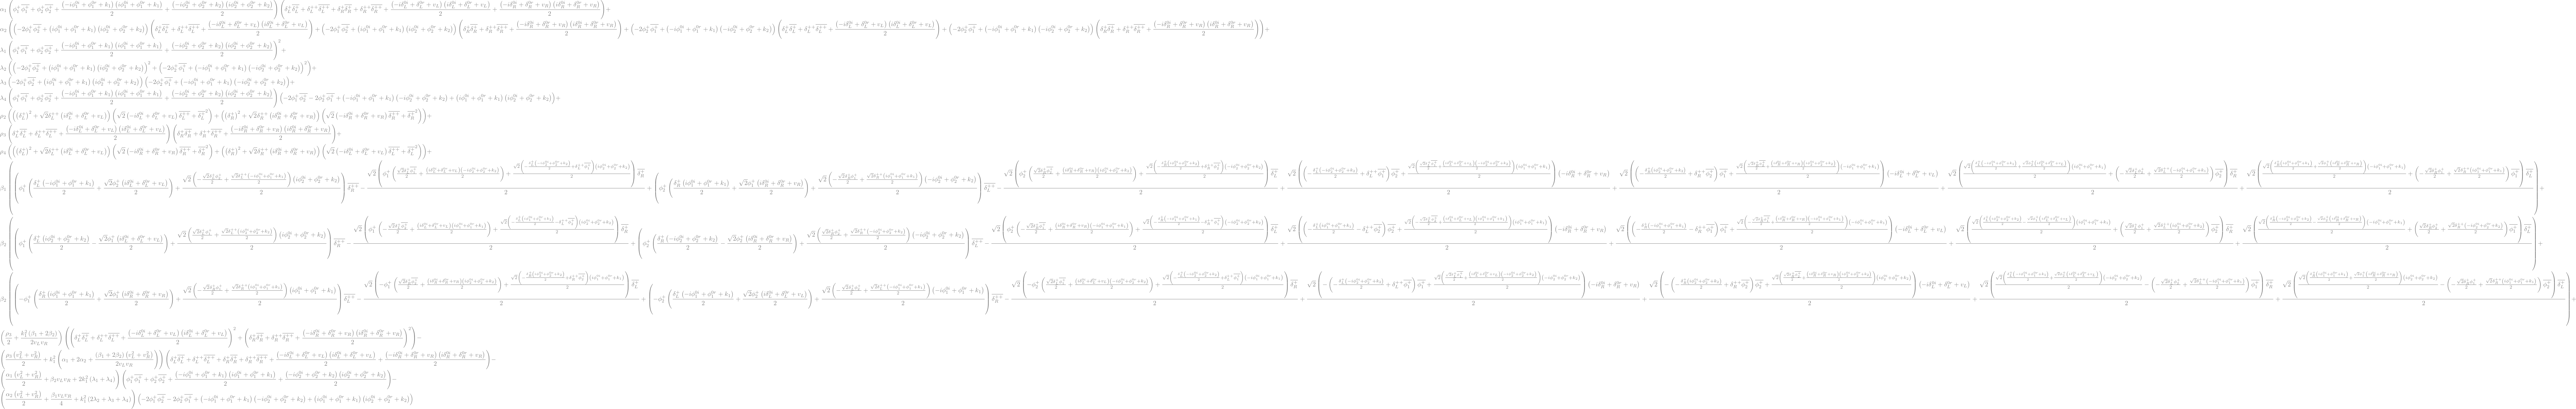

In [463]:
#VLRPhi_ri_tadpole_caso1 = VLRPhi_ri.subs(tadpole12_sol_caso1).subs(mu32_sol)
VLRPhi_ri_tadpole_caso1 = VLRPhi_ri.subs(tadpole_conditions_caso1)
VLRPhi_ri_tadpole_caso1

In [464]:
vevPhi[phi10r] = 0#vevPhi[phi10]
vevPhi[phi10i] = 0
vevPhi[phi20r] = 0#vevPhi[phi20]
vevPhi[phi20i] = 0

In [465]:
vevL[deltaL0r] = 0#vevL[deltaL0]
vevL[deltaL0i] = 0
vevR[deltaR0r] = 0#vevR[deltaR0]
vevR[deltaR0i] = 0

In [466]:
from sympy import derive_by_array

In [467]:
def build_mass_matrix(potential, fields1, fields2):
    """
    Build the mass matrix for a given potential and fields.
    """
    # Initialize the mass matrix
    Matrix_elements = derive_by_array(derive_by_array(potential, fields1), fields2)

    return Matrix_elements.tomatrix()

## Neutral scalars

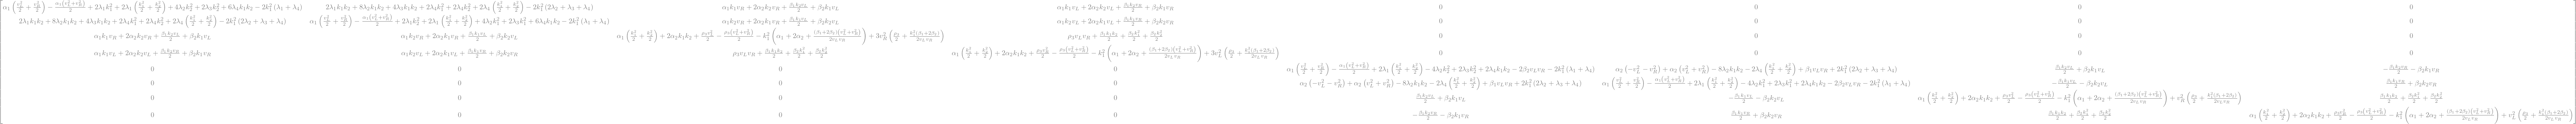

In [468]:
phir_fields = [phi10r, phi20r, deltaR0r, deltaL0r]
phii_fields = [phi10i, phi20i, deltaR0i, deltaL0i]
phiri_fields = phir_fields + phii_fields

MRI_square = (build_mass_matrix(VLRPhi_ri_tadpole_caso1, phiri_fields, phiri_fields)).subs(
    vevPhi
).subs(vevL).subs(vevR)
MRI_square

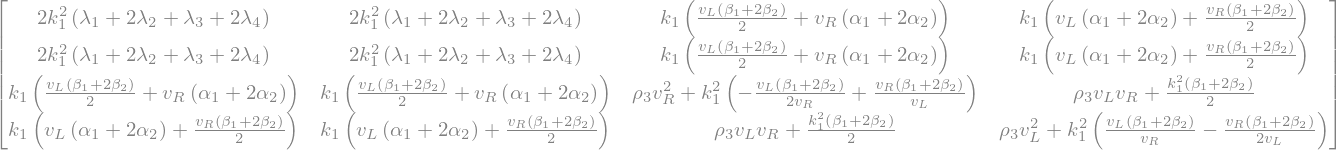

In [469]:
Mrr = MRI_square[0:4, 0:4].applyfunc(lambda x: x.expand().trigsimp().subs(k2, k1).collect([k1, vL, vR], lambda x:x.collect([vL, vR],factor)))
Mrr

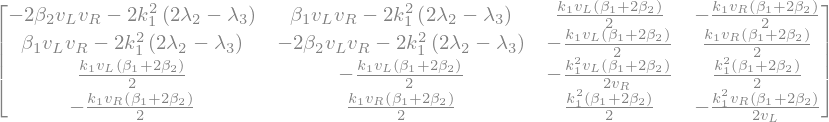

In [470]:
Mii = MRI_square[4:8, 4:8].applyfunc(
    lambda x: x.expand().trigsimp().subs(k2, k1).collect([k1, vL, vR], lambda x:x.collect([vL, vR],factor))
)
Mii

In [471]:
Mii.rank()

In [472]:
#Mii_vR = Mii.tomatrix().applyfunc(lambda x: large_term_propto_(x, vR).factor())
#Mii_vR

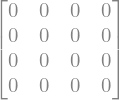

In [473]:
Mri = MRI_square[0:4, 4:8]
Mri

## Singly charges scalars

In [475]:
from sympy import Dummy

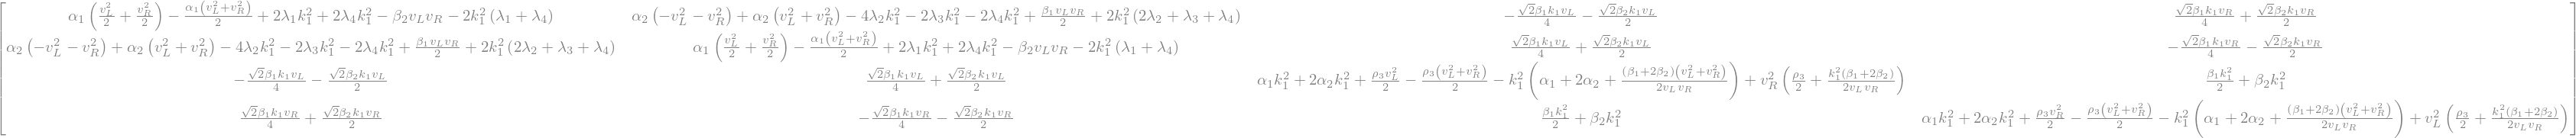

In [476]:
phip_fields = [phi1p, phi2p, deltaRp, deltaLp]

dummyconjugate1p = Dummy(r'\phi_1^{+,d}')
dummyconjugate2p = Dummy(r'\phi_2^{+,d}')
dummyconjugateRp = Dummy(r'\delta_R^{+,d}')
dummyconjugateLp = Dummy(r'\delta_L^{+,d}')

dummychangep = {
    conjugate(phi1p):dummyconjugate1p,
    conjugate(phi2p):dummyconjugate2p,
    conjugate(deltaRp):dummyconjugateRp,
    conjugate(deltaLp):dummyconjugateLp
}
phim_fields = [dummyconjugate1p, dummyconjugate2p, dummyconjugateRp, dummyconjugateLp] #list(dummychangep.values())
Mp_square = (derive_by_array(derive_by_array(VLRPhi_ri_tadpole_caso1.subs(dummychangep), phim_fields), phip_fields)).subs(
    {value:key for key, value in dummychangep.items()}
).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2, k1)
Mp_square

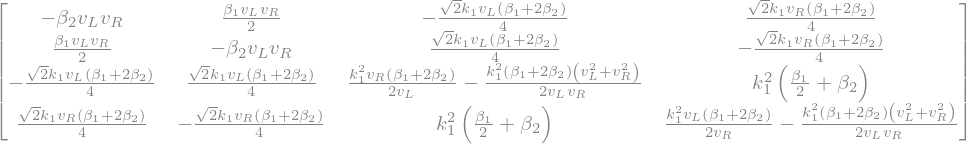

In [477]:
Mp_square.applyfunc(lambda x:x.collect(k1, lambda x:x.factor().collect([vL, vR])))

In [478]:
Mp_square.rank()

## Doubly charged scalars

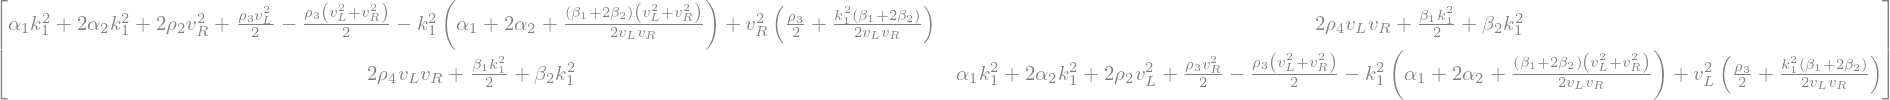

In [479]:
phipp_fields = [deltaRpp, deltaLpp]
dummyconjugateRpp = Dummy('deltaRpp')
dummyconjugateLpp = Dummy('deltaLpp')
dummychangepp = {
    conjugate(deltaRpp):dummyconjugateRpp,
    conjugate(deltaLpp):dummyconjugateLpp
}
phippc_fields = list(dummychangepp.values())#[deltaRmm, deltaLmm]
display(phippc_fields)
Mpp_square = (
    build_mass_matrix(VLRPhi_ri_tadpole_caso1.subs(dummychangepp), fields1=phippc_fields, fields2=phipp_fields)
).subs({value:key for key, value in dummychangepp.items()}).subs(
    vevPhi
).subs(vevL).subs(vevR).subs(k2, k1)
Mpp_square#.applyfunc(factor)

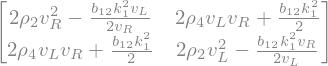

In [480]:
Mpp_square = Mpp_square.applyfunc( lambda x:x.expand().collect(k1, factor)).subs(tadpoles_paterns)
Mpp_square

# Diagonalization of mass matrices

The following two functions allows us calculate the mass matrices

## Doubly charged scalars

In [481]:
#Mpp_square.rank()

In [482]:
Ppp, Dpp = Mpp_square.diagonalize()

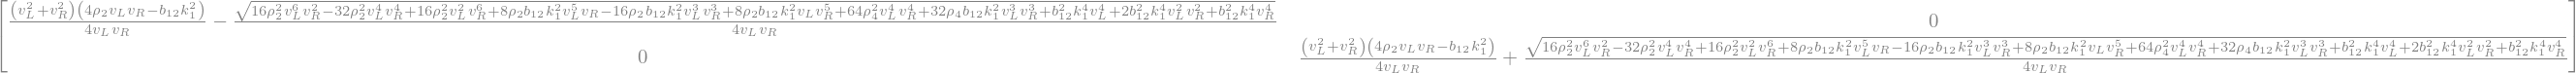

In [483]:
Dpp

In [424]:
#b12 = symbols('b_{12}', positive=True)

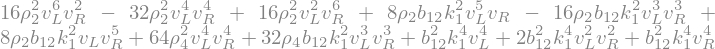

In [484]:
terminsqrt = (Dpp[0,0] - Dpp[1,1]).simplify().args[3].args[0]
terminsqrt

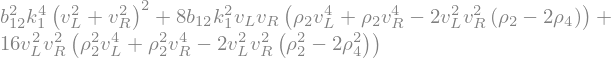

In [485]:
terminsqrt_approx = terminsqrt.collect([k1], lambda x:x.factor().collect([vL,vR], factor))
terminsqrt_approx

In [486]:
Dpp[0,0] = Dpp[0,0].subs(
        terminsqrt,
        terminsqrt_approx
    ).collect([-k1**2])#.subs(beta1 + 2*beta2, b12)

Dpp[1,1] = Dpp[1,1].subs(
        terminsqrt,
        terminsqrt_approx
    ).collect([-k1**2])#.subs(beta1 + 2*beta2, b12)

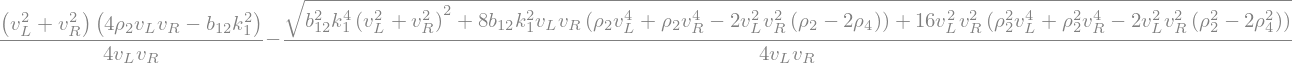

In [487]:
Dpp[0,0]

In [488]:
mH1pp = symbols('m_{H_1^{++}}', positive=True)
mH2pp = symbols('m_{H_2^{++}}', positive=True)

In [489]:
from sympy import Eq

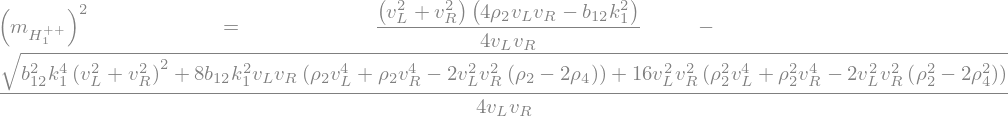

In [490]:
eq1 = Eq(mH1pp**2, Dpp[0,0])
eq1

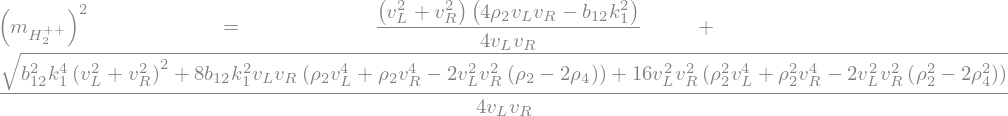

In [491]:
eq2 = Eq(mH2pp**2, Dpp[1,1])
eq2

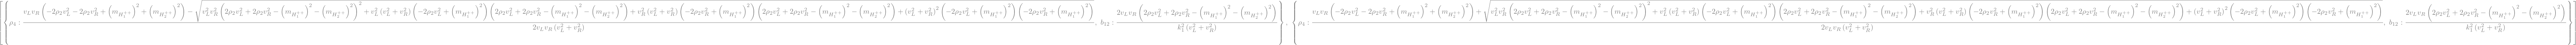

In [492]:
rho23_sol = solve([eq1, eq2], [rho4, b12], dict=True)#[0] # beta1*k1**2 + 2*beta2*k1**2
rho23_sol

In [493]:
from sympy import multiline_latex

In [334]:
print(multiline_latex(eq1.lhs, eq1.rhs, terms_per_line=1))

\begin{align*}
\left(m_{H_1^{++}}\right)^{2} = & \frac{\left(v_{L}^{2} + v_{R}^{2}\right) \left(4 \rho_{2} v_{L} v_{R} - b_{12} k_{1}^{2}\right)}{4 v_{L} v_{R}} \\
& - \frac{\sqrt{b_{12}^{2} k_{1}^{4} \left(v_{L}^{2} + v_{R}^{2}\right)^{2} + 8 b_{12} k_{1}^{2} v_{L} v_{R} \left(\rho_{2} v_{L}^{4} + \rho_{2} v_{R}^{4} - 2 v_{L}^{2} v_{R}^{2} \left(\rho_{2} - 2 \rho_{4}\right)\right) + 16 v_{L}^{2} v_{R}^{2} \left(\rho_{2}^{2} v_{L}^{4} + \rho_{2}^{2} v_{R}^{4} - 2 v_{L}^{2} v_{R}^{2} \left(\rho_{2}^{2} - 2 \rho_{4}^{2}\right)\right)}}{4 v_{L} v_{R}} 
\end{align*}


$$
\begin{align*}
\left(m_{H_1^{++}}\right)^{2} = & \frac{\left(v_{L}^{2} + v_{R}^{2}\right) \left(4 \rho_{2} v_{L} v_{R} - b_{12} k_{1}^{2}\right)}{4 v_{L} v_{R}} \\
& - \frac{\sqrt{b_{12}^{2} k_{1}^{4} \left(v_{L}^{2} + v_{R}^{2}\right)^{2} + 8 b_{12} k_{1}^{2} v_{L} v_{R} \left(\rho_{2} v_{L}^{4} + \rho_{2} v_{R}^{4} - 2 v_{L}^{2} v_{R}^{2} \left(\rho_{2} - 2 \rho_{4}\right)\right) + 16 v_{L}^{2} v_{R}^{2} \left(\rho_{2}^{2} v_{L}^{4} + \rho_{2}^{2} v_{R}^{4} - 2 v_{L}^{2} v_{R}^{2} \left(\rho_{2}^{2} - 2 \rho_{4}^{2}\right)\right)}}{4 v_{L} v_{R}} 
\end{align*}
$$

## Mass singly charged scalars

In [496]:
tadpoles_paterns

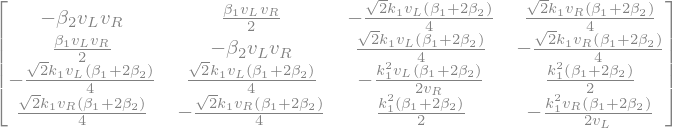

In [507]:
Mp_square = Mp_square.subs(b12, beta1 + 2*beta2).applyfunc(lambda x:x.collect(k1, factor)).applyfunc( # .subs(tadpoles_paterns)
    lambda x:x.expand().collect([alpha12, b12], factor)
)
Mp_square

In [508]:
Mp_square.applyfunc(factor).rank()

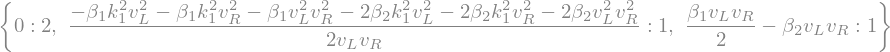

In [509]:
Mp_eigenvals_dict = Mp_square.applyfunc(factor).tomatrix().eigenvals()
Mp_eigenvals_dict

In [510]:
Pp, Dp = Mp_square.applyfunc(factor).tomatrix().diagonalize()

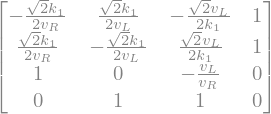

In [511]:
Pp

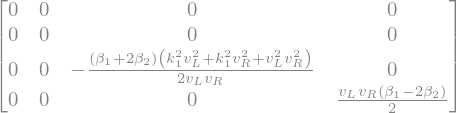

In [512]:
Dp = Dp.applyfunc(factor)
Dp

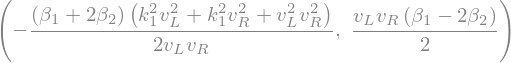

In [513]:
mH1p_exp, mH2p_exp = Dp[2,2], Dp[3,3]
mH1p_exp, mH2p_exp

In [514]:
mH1p, mH2p = symbols('m_{H_1^+}, m_{H_2^+}', positive=True)

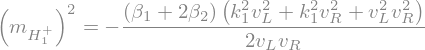

In [515]:
eq1p = Eq(mH1p**2, mH1p_exp.factor())
eq1p

In [525]:
print(multiline_latex(eq1p.lhs, eq1p.rhs))

\begin{align*}
\left(m_{H_1^+}\right)^{2} = &- \frac{\left(\beta_{1} + 2 \beta_{2}\right) \left(k_{1}^{2} v_{L}^{2} + k_{1}^{2} v_{R}^{2} + v_{L}^{2} v_{R}^{2}\right)}{2 v_{L} v_{R}} 
\end{align*}


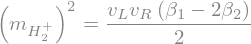

In [516]:
eq2p = Eq(mH2p**2, mH2p_exp.factor())
eq2p

In [527]:
print(multiline_latex(eq2p.lhs, eq2p.rhs))

\begin{align*}
\left(m_{H_2^+}\right)^{2} = & \frac{v_{L} v_{R} \left(\beta_{1} - 2 \beta_{2}\right)}{2} 
\end{align*}


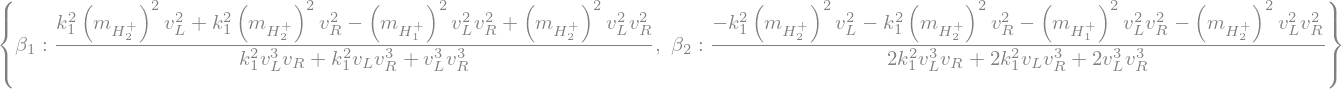

In [517]:
beta12_sol = solve([eq1p, eq2p], [beta1, beta2], dict=True)[0]
beta12_sol

In [559]:
#for param, exp in beta12_sol.items():
#    print(multiline_latex(param, exp))
#    print('\n')

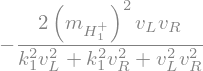

In [518]:
(beta1 + 2*beta2).subs(beta12_sol).simplify()

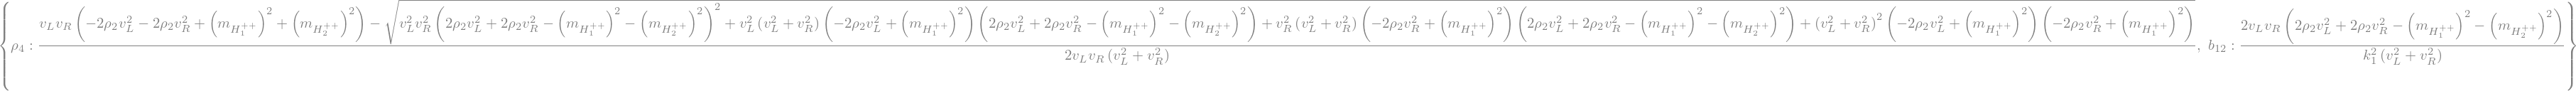

In [520]:
rho23_sol[0]

In [521]:
rho24_sol = []
for sol in rho23_sol:
    rho2_sol = solve(sol[b12] - (beta1 + 2*beta2).subs(beta12_sol).simplify(), rho2, dict=True)[0]
    rho2_sol[rho2] = rho2_sol[rho2].expand().collect(k1, factor)#lambda x:x.collect([vL, vR], factor)
    dic_rho24 = {}
    dic_rho24[rho4] = sol[rho4].subs(rho2_sol).expand().collect(k1, lambda x:x.collect([vL, vR], factor))
    dic_rho24[rho2] = rho2_sol[rho2]
    rho24_sol.append(dic_rho24)
    

In [522]:
for sol in rho24_sol:

    sol[rho4] = sol[rho4].collect(
            k1,
            lambda x:x.collect(
                [mH1pp**2 - mH2p**2 + mH2pp**2, mH1pp**2 + mH2pp**2], factor
            )
        ).collect(k1, factor)

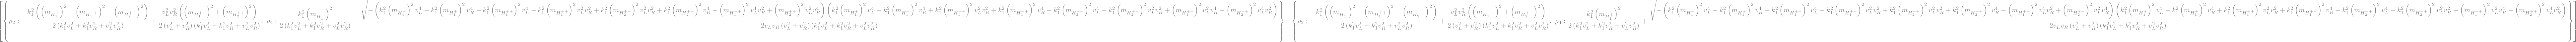

In [523]:
rho24_sol

In [298]:
for sol in rho24_sol:
    termin_sqrt_rho4_sol = sol[rho4].args[1].args[3].args[0]
    termin_sqrt_rho4_sol_simplify = termin_sqrt_rho4_sol.collect(k1, lambda x:x.collect([vL, vR], simplify))#
    sol[rho4] = sol[rho4].subs(termin_sqrt_rho4_sol, termin_sqrt_rho4_sol_simplify)#.collect(
        #k1,
        #lambda x:x.collect(
        #    [mH1pp**2 - mH2p**2 + mH2pp**2, mH1pp**2 + mH2pp**2], factor
        #)
    #)

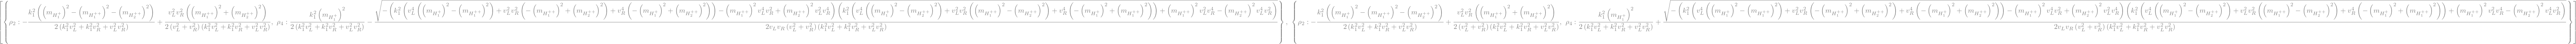

In [299]:
rho24_sol

## Mass neutral scalars

## Cp odd

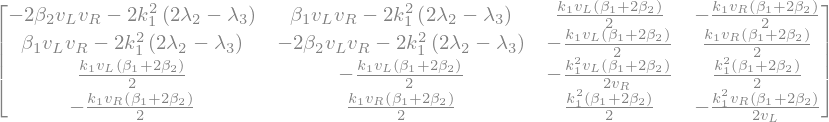

In [528]:
Mii.applyfunc(lambda x:x.collect(k1, factor).collect([vL, vR], factor))

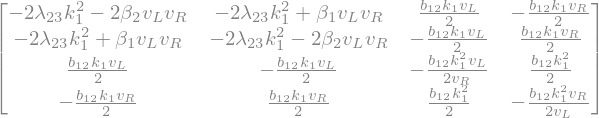

In [529]:
lamb23 = symbols(r'\lambda_{23}', real=True)
lambda_beta_changes = {
    2*lamb2 - lamb3 :lamb23,
    beta1 + 2*beta2:b12
}
Mii_simplify = Mii.applyfunc(lambda x:x.collect(k1, factor).collect([vL, vR], factor)).subs(lambda_beta_changes)
Mii_simplify

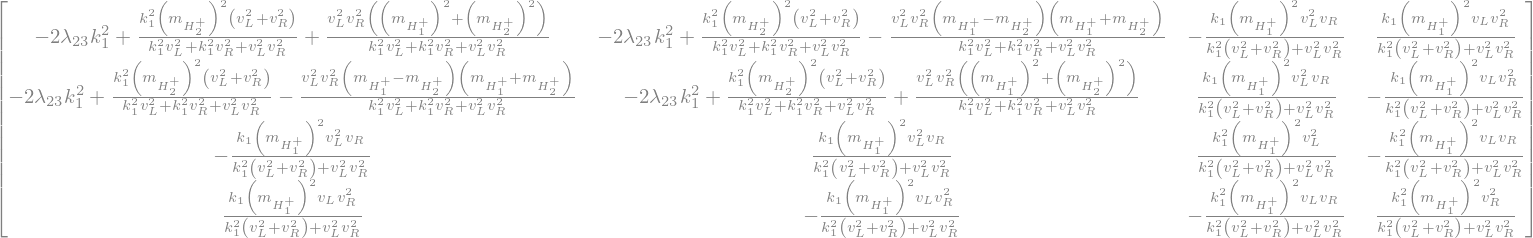

In [530]:
Mii_simplify2 = Mii_simplify.subs(b12, (beta1 + 2*beta2).subs(beta12_sol).factor()).subs(beta12_sol).applyfunc(
    lambda x: x.expand().collect(lamb23, lambda x:x.collect([k1], factor))
)
Mii_simplify2

In [531]:
Pii, Dii = Mii_simplify2.diagonalize()

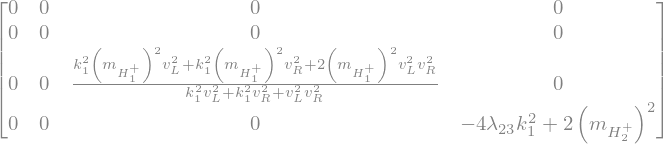

In [532]:
Dii

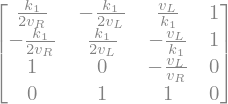

In [533]:
Pii

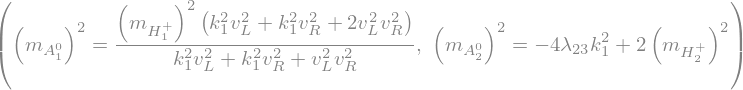

In [534]:
mA1 = symbols('m_{A_1^0}', positive=True)
mA2 = symbols('m_{A_2^0}', positive=True)
eq1ii = Eq(mA1**2, Dii[2,2].factor())
eq2ii = Eq(mA2**2, Dii[3,3])
eq1ii, eq2ii

In [535]:
print(multiline_latex(eq1ii.lhs, eq1ii.rhs))

\begin{align*}
\left(m_{A_1^0}\right)^{2} = & \frac{\left(m_{H_1^+}\right)^{2} \left(k_{1}^{2} v_{L}^{2} + k_{1}^{2} v_{R}^{2} + 2 v_{L}^{2} v_{R}^{2}\right)}{k_{1}^{2} v_{L}^{2} + k_{1}^{2} v_{R}^{2} + v_{L}^{2} v_{R}^{2}} 
\end{align*}


In [536]:
print(multiline_latex(eq2ii.lhs, eq2ii.rhs))


\begin{align*}
\left(m_{A_2^0}\right)^{2} = &- 4 \lambda_{23} k_{1}^{2} \\
& + 2 \left(m_{H_2^+}\right)^{2} 
\end{align*}


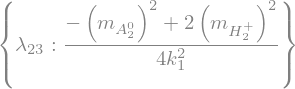

In [307]:
lamb23_sol = solve(eq2ii, lamb23, dict=True)[0]
lamb23_sol

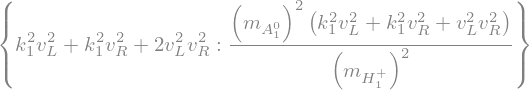

In [308]:
term_vev1LR = solve(eq1ii, k1**2*vL**2 + k1**2*vR**2 + 2*vL**2*vR**2, dict=True)[0]
term_vev1LR 

In [309]:
beta12_sol[beta1] = beta12_sol[beta1].factor().subs(term_vev1LR).factor().collect([k1], factor)

In [310]:
beta12_sol[beta2] = beta12_sol[beta2].factor().subs(term_vev1LR).factor().collect([k1], factor)

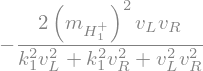

In [311]:
(beta1 + 2*beta2).subs(beta12_sol).factor()

## CP even

In [538]:
tadpoles_paterns

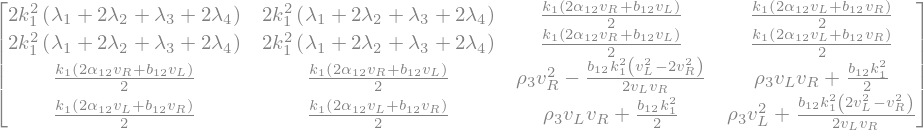

In [537]:
Mrr.applyfunc(lambda x:x.collect(k1, factor).collect([vL, vR], factor)).subs(tadpoles_paterns)

In [539]:
lambda_beta_changes

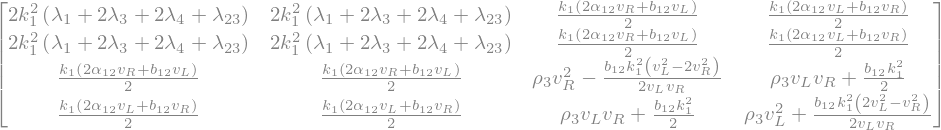

In [540]:
alpha12 = symbols(r'\alpha_{12}', real=True)
lambda_alpha_changes = {
    2*lamb2:lamb23 + lamb3,
    alpha1 + 2*alpha2: alpha12,
    beta1 + 2*beta2:b12
}
Mrr_simplify = Mrr.applyfunc(lambda x:x.collect(k1, factor).collect([vL, vR], factor)).subs(lambda_alpha_changes)
Mrr_simplify


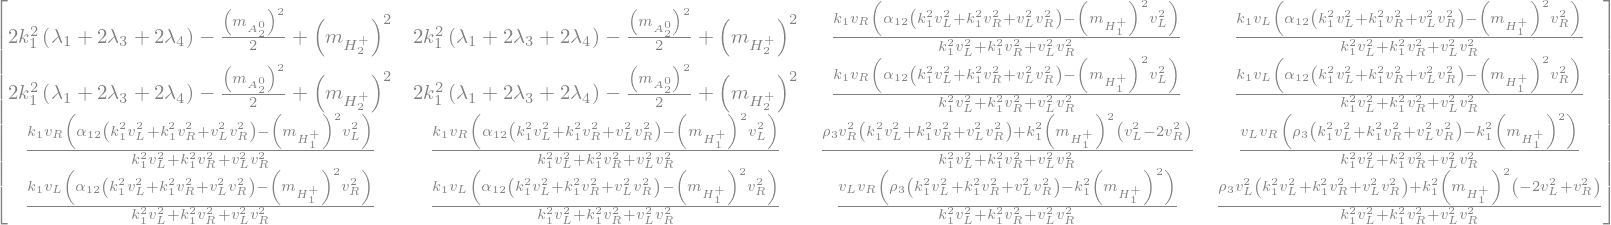

In [541]:
Mrr_simplify2 = Mrr_simplify.subs(
    b12, (beta1 + 2*beta2).subs(beta12_sol).factor()
).subs(lamb23_sol).applyfunc(simplify)
Mrr_simplify2

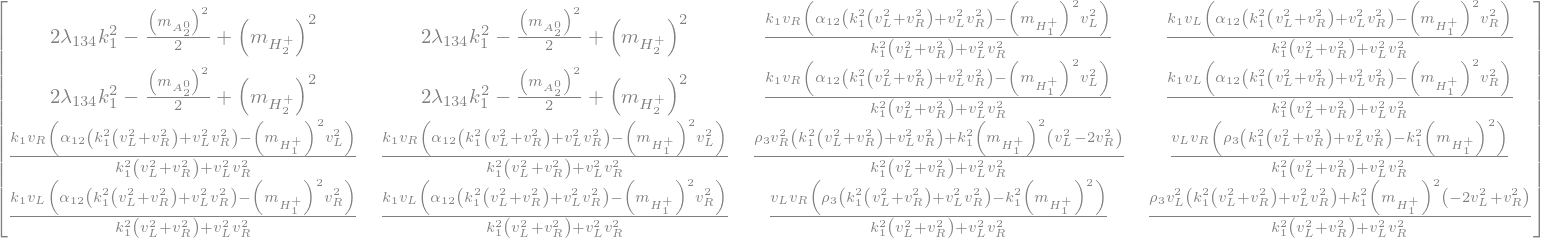

In [542]:
lamb134 = symbols(r'\lambda_{134}', real=True)
lambda_changes = {lamb1 + 2*lamb3 + 2*lamb4: lamb134}
Mrr_simplify3 = Mrr_simplify2.subs(lambda_changes).applyfunc(
    lambda x:x.subs(term_vev1LR).collect(k1, simplify)# lambda x:x.collect([vL, vR], simplify)
)
Mrr_simplify3

In [317]:
#Mrr_simplify3.eigenvals()

In [318]:
# Prr, Drr = Mrr_simplify3.diagonalize()

In [560]:
r = symbols('r', positive=True)
r_change = {vL:r*vR}
def large_term_propto_(exp, order=2):

    # Convert the expression to a polynomial and find the highest degree term
    term_approx = exp.subs(r_change).series(x=r, x0=0, n=order).removeO().subs(r, vL/vR)

    return term_approx

In [544]:
#def charpoly_coeffs_approximatevR(M, simplification= lambda x:x):
#    """
#    Approximate the coefficients of the characteristic polynomial of a matrix M
#    keeping only the terms with large degree on vR
#    """
#    charpoly = M.charpoly()
#    coeffs = charpoly.coeffs()
#    for i in range(len(coeffs)):
#        coeffs[i] = simplification(large_term_propto_(coeffs[i], vR))
#    return coeffs

#def construct_poly(coeffs_list, x):
#    """
#    Construct a polynomial from a list of coefficients
#    """
#    poly = 0
#    power = len(coeffs_list)
#    for i in range(power):
#        poly += coeffs_list[i] * x**(power-1 - i)
#    return poly

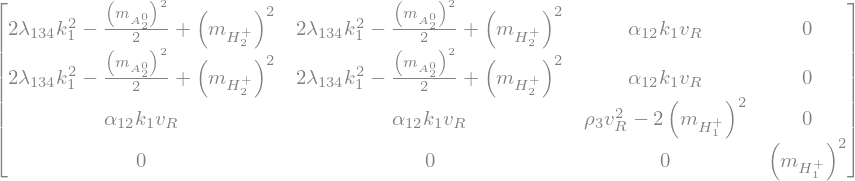

In [545]:
Mrr_simplify3.subs(vL,0).applyfunc(simplify)

In [568]:
#Mrr_3x3 = Mrr_simplify3.subs(vL, 0)[0:3, 0:3]
#Mrr_3x3

In [569]:
#Mrr_3x3.eigenvals()

In [572]:
#Mrr_simplify4 = Mrr_simplify3.applyfunc(lambda x:large_term_propto_(x, 2).simplify())
#Mrr_simplify4

In [573]:
#Mrr_simplify4.applyfunc(simplify)#.subs(vL,0)

In [574]:
Prr, Drr = Mrr_simplify3.applyfunc(simplify).subs(vL,0).diagonalize()

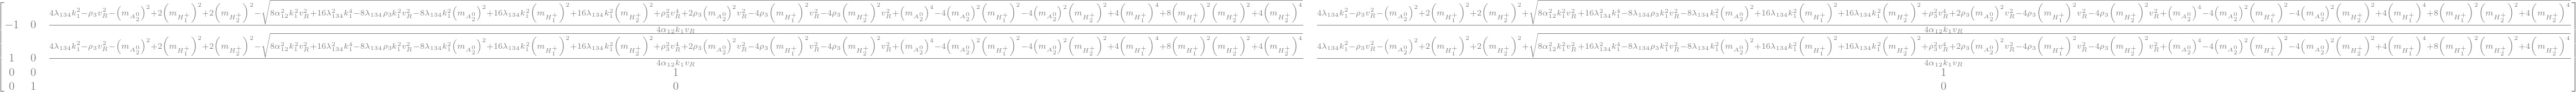

In [576]:
Prr

In [588]:
#simplify(Prr.subs(rho3, 0).subs(lamb134, 0).applyfunc(lambda x:x.series(x=k1, x0=0, n=2).removeO()))

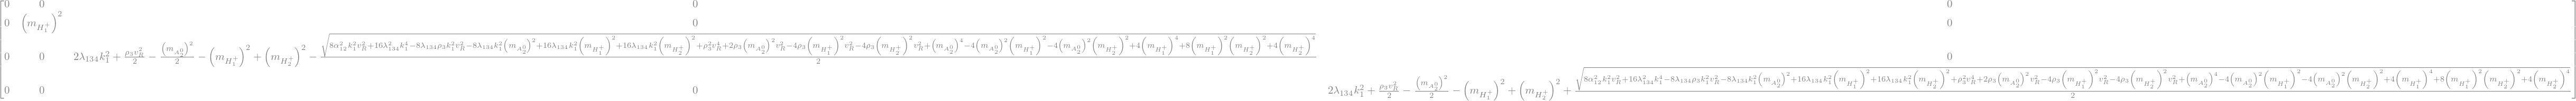

In [589]:
Drr

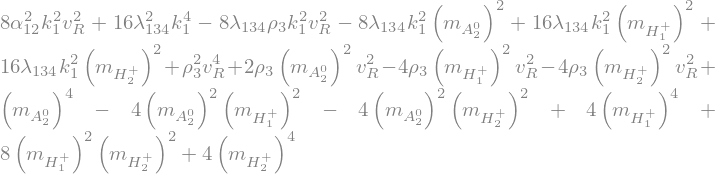

In [591]:
terminsqrt_rr = (Drr[2,2] - Drr[3,3]).simplify().args[1].args[0]
terminsqrt_rr

In [592]:
terminsqrt_approx_rr =terminsqrt_rr.collect(k1, lambda x:x.collect(vR, factor))

In [593]:
Drr[2,2] = Drr[2,2].subs(
        terminsqrt_rr,
        terminsqrt_approx_rr
    ).collect([k1**2])

Drr[3,3] = Drr[3,3].subs(
        terminsqrt_rr,
        terminsqrt_approx_rr
    ).collect([k1**2])

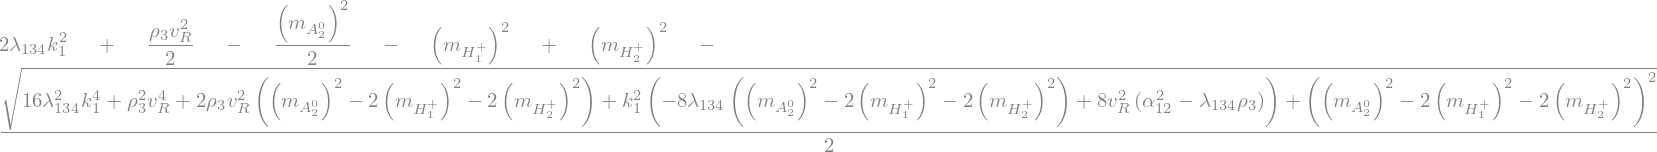

In [594]:
Drr[2,2]

In [595]:
mH1, mH2, mH3, mH4 = symbols('m_{H_1}, m_{H_2}, m_{H_3}, m_{H_4}', positive=True)

In [596]:
eq3rr = Eq(mH3**2, Drr[2,2])
eq4rr = Eq(mH4**2, Drr[3,3])

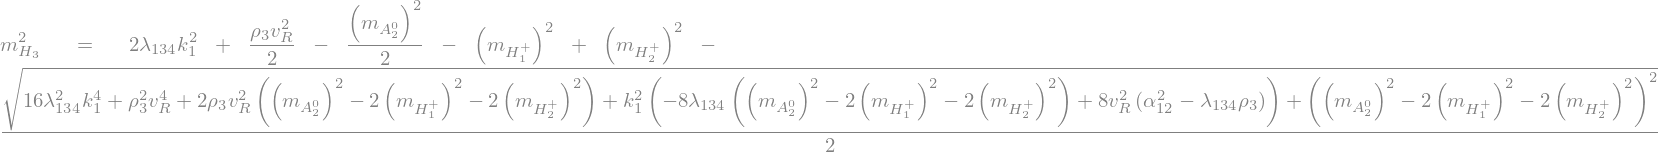

In [597]:
eq3rr

In [601]:
#print(multiline_latex(eq3rr.lhs, eq3rr.rhs, terms_per_line=5))

In [602]:
#print(multiline_latex(eq4rr.lhs, eq4rr.rhs, terms_per_line=5))

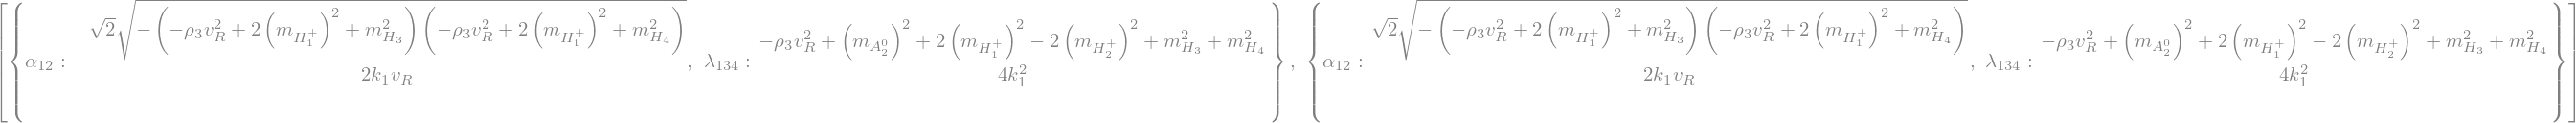

In [603]:
lamb134_alpha12_sol = solve([eq3rr, eq4rr], [alpha12, lamb134], dict=True)
lamb134_alpha12_sol

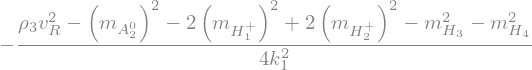

In [604]:
lamb134_alpha12_sol[0][lamb134].factor()

# Yukawa charged lepton sector

In [418]:
from sympy import IndexedBase, Idx

In [419]:
#Indexed?

In [420]:
i,j = symbols('i, j', cls=Idx)
#h = IndexedBase('h')
#ht = IndexedBase(r'\tilde{h}')
hij = symbols('h_{ij}')
htij = symbols(r'\tilde{h}_{ij}')

In [421]:
#ht[i, j]

In [422]:
nueL, numuL, nutauL = symbols(r'{{\nu_{L}}}_e, {{\nu_{L}}}_\mu, {{\nu_{L}}}_\tau')
nueR, numuR, nutauR = symbols(r'{{\nu_{R}}}_e, {{\nu_{R}}}_\mu, {{\nu_{R}}}_\tau')
nuL = IndexedBase(r'{{\nu_{L}}}')
nuR = IndexedBase(r'{{\nu_{R}}}')
eL, muL, tauL = symbols(r'e_L, \mu_L, \tau_L')
eR, muR, tauR = symbols(r'e_R, \mu_R, \tau_R')
lL = IndexedBase('{{l_L}}')
lR = IndexedBase('{{l_R}}')

In [ ]:
nueL, nuL[i]

In [ ]:
LLi = Matrix(
    [
        [nuL[i]],
        [lL[i]]
    ]
)
LRj = Matrix(
    [
        [nuR[j]],
        [lR[j]]
    ]
)
Dagger(LLi), LRj

⎛⎡______________  __________⎤  ⎡{{\nu_{R}}}[j]⎤⎞
⎜⎣{{\nu_{L}}}[i]  {{l_L}}[i]⎦, ⎢              ⎥⎟
⎝                              ⎣  {{l_R}}[j]  ⎦⎠

In [ ]:
Phitilde

⎡\phi⁰₂   -\phi⁻₂⎤
⎢                ⎥
⎣-\phi⁺₁  \phi⁰₁ ⎦

In [ ]:
LY = (Dagger(LLi)*(hij*Phi + htij*Phitilde)*LRj)[0].subs(vevPhi)

In [ ]:
LY

Charged lepton mass

In [ ]:
Ml = LY.args[0].args[0]
Ml

Dirac neutrino mass

In [ ]:
MnuD = LY.args[1].args[0]
MnuD

As we know, the scale of mass of charged leptons is greater than neutrino mass scale. Thus, we assume $k >> k_1$ and $h_{ij} >> \tilde{h}_{ij}$. In this aproximation

In [ ]:
Ml = k*hij
Ml